# ニューラルネットワークの学習

## ルールベース、機械学習、深層学習の違い

* アルゴリズム：人がルールを考える
* 機械学習：人が特徴量を設計し、機械学習アルゴリズムが分類・回帰ルールを作る
* 深層学習：データをそのまま学習、特徴量と分類・回帰ルールどちらも深層学習アルゴリズムが作る

![アルゴリズム、機械学習、深層学習](alg_ml_dl.png)

## 損失関数

### なぜ損失関数を使うのか

Q. 単純な問いとして、評価指標（例えばaccuracy）を直接最適化すれば良いのでは？<br>
A. 評価指標はステップ関数のような形のため、ほとんどのところで微分がゼロになる。（1つ当たるたびに1/Nずつ値が増える）<br>
    パラメータを少し動かしても評価指標の値が変わらずどの方向にパラメータを動かせばよいのか精度が向上するのか判断できないため、滑らかな関数を最適化の目的関数に選ばなければならない。、<br>
    そこで損失関数がその役割を果たす。

### 交差エントロピー

* 定義式：<br>
![交差エントロピー](cross_entropy.png)
    - yはニューラルネットワークの出力値
    - tは正解ラベルの出力値だけ1、それ以外0（one-hot表現）
* 正解ラベルの出力値だけを足す
* 自然対数は1に近いほど0に近づくので、正解ラベルの出力値が高いほど損失関数の値が小さくなる

C:\Users\kuruz\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


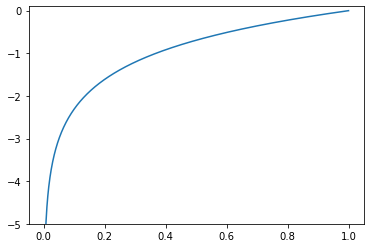

In [8]:
# 自然対数のグラフを表示
import numpy as np
import matplotlib.pylab as plt

X = np.arange(0,1,0.001)
Y = np.log(X)
plt.plot(X,Y)
plt.ylim(-5,0.1)
plt.show()

## 学習データサイズと学習方法

参考：[【AI・機械学習】バッチ学習とオンライン学習とミニバッチ学習｜データ処理・投入方法の解説](https://di-acc2.com/analytics/ai/6320/)<br>
![学習データサイズと学習方法](learn_ptn.jpg)


### バッチ学習

■メリット<br>
* 一度に全てのデータを利用するため学習の進行が安定しやすい。
* 学習データに少量の異常データが混じっていても、モデル性能に与える悪影響を小さく抑えることができる。

■デメリット<br>
* 全データを利用するため、使用するメモリ量が大きくなる。計算負荷が大きい。
* 株価予測などリアルタイムで何度もモデルを更新するケースでは適用が難しい。

![バッチ学習](batch.jpg)

### オンライン学習

■メリット<br>
* 1件ずつデータを投入するためメモリ使用量も少なく、モデル学習にかかる計算負荷も小さい。
* バッチ学習が不得意とするリアルタイムでモデル更新を頻繁に行うケースにも適用しやすい。

■デメリット<br>
* 1データごとにパラメータを更新するため学習が安定しにくく、1データ単位の計算速度はバッチ学習に劣る。
* 異常なデータが入力されると、モデルの予測性能がそのデータにひっぱられる可能性がある。異常検出アルゴリズムのような、異常データをモニタリングできる仕組みが別途必要となる。

■特徴<br>
オンライン学習では「学習率」の設定が重要となります。学習率はモデル学習に適用する新規データの割合です。学習率が高いと新規の入力データに適応しやすくなる一方で、古いデータから得られた情報が消失しやすくなります。一方で、学習率が低いとトレードオフの関係で、新しいデータへの適用度は下がる一方で古いデータの情報は保持できるようになります。

![オンライン学習](online.jpg)

### ミニバッチ学習

■特徴<br>
* 学習の進行はオンライン学習より安定・バッチ学習より不安定。
* 異常データから受けるモデル学習への影響度は、オンライン学習より小さく、バッチ学習より大きい。
* 1データあたりの計算速度はオンライン学習より速く、バッチ学習より遅い。
* メモリ使用量はオンライン学習より大きく、バッチ学習より少ない。

⇒現在の機械学習ブームを牽引する深層学習ではほとんどの場合、このミニバッチ学習が利用されます。扱うデータ数が増加しているためバッチ学習の実行はメモリサイズ的に現実的でないケースが多く、ミニバッチ学習を利用しなるべく大きなバッチサイズを設定することが一般的です。

![ミニバッチ](mini_batch.jpg)

## 数値微分

* 前方微分、中央微分、後方微分の中で一番誤差が少ないのが中央微分。
* ただし要証明